 <font size=5><font color='#5e20ab'><b>Дашборд для Яндекс.Дзен

## <i>Описание проекта

<font size=2,5><i>Вы работаете аналитиком в Яндекс.Дзене. Почти всё ваше время занимает анализ пользовательского взаимодействия с карточками статей.<br/>
Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».<br/>
Пользователей системы характеризует возрастная категория. Скажем, «26-30» или «45+».<br/>
    
Есть три способа взаимодействия пользователей с системой:
* Карточка отображена для пользователя (show);
* Пользователь кликнул на карточку (click);
* Пользователь просмотрел статью карточки (view).<br/>
    
Каждую неделю менеджеры задают вам одни и те же вопросы:
- Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?<br/>

На шестую неделю работы вы решаете, что процесс пора автоматизировать. Для Дениса и Валерии нужно сделать дашборд.
Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет разработан для вас дата-инженерами.

## <i>Техническое задание

<font size=2,5><i>
* <b>Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;</b>
* Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
* Кто будет основным пользователем дашборда: менеджеры по анализу контента;
    
    
* <u>Состав данных для дашборда:</u>
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
    
    
* <u>По каким параметрам данные должны группироваться:</u>
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
    
    
* <u>Характер данных:</u>
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины;
    
    
* Важность: все графики имеют равную важность;
* Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица `log_raw`);
* База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД `zen`;
* Частота обновления данных: один раз в сутки, в полночь по UTC;
* Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде:

    
<p style="text-align: center;"><b>Макет дашборда

![jupyter](https://i2.paste.pics/69108a36ef8d8ec12562acdf2de213f8.png)

## Запрос к базе

In [27]:
# импортируем библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

# для графиков, just in case
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(20, 8)})
sns.set_style("darkgrid", {"grid.color": "dimgray", "grid.linestyle": ":"})

# подключение к базе
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 
query = ''' SELECT *
            FROM dash_visits
        '''# тут sql-запрос для выгрузки данных из таблицы dash_visits

dash_visits = pd.io.sql.read_sql(query, con = engine) 
# тут код для сохранения результатов sql-запроса

## Проверка данных

In [3]:
# функция для первого взгляда
def first_look(df):
    print('\033[1m' + 'Общая информация о датасете:' + '\033[0m')
    df.info(),
    (df.style.set_properties(
    **{'text-align': 'center'}).highlight_null(null_color='lightcoral')),
    print('-'*10*3),
    print('Количество пропусков в таблице:'),
    print(df.isna().sum()),
    print('-'*10*3),
    print('Количество дублей:', df.duplicated().sum())
    return df.sample(10, random_state=1)

first_look(dash_visits)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB
------------------------------
Количество пропусков в таблице:
record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64
------------------------------
Количество дублей: 0


,record_id,item_topic,source_topic,age_segment,dt,visits
12599,1053196,Культура,Полезные советы,26-30,2019-09-24 19:00:00,1
10691,1051288,История,Спорт,18-25,2019-09-24 19:00:00,4
8682,1049279,Искусство,История,31-35,2019-09-24 19:00:00,2
23712,1064309,Рассказы,Семейные отношения,26-30,2019-09-24 18:54:00,17
6192,1046789,Знаменитости,Музыка,18-25,2019-09-24 18:29:00,1
28655,1069251,Туризм,Семейные отношения,45+,2019-09-24 18:54:00,4
14154,1054751,Наука,Ремонт,41-45,2019-09-24 18:57:00,3
16891,1057488,Отношения,Политика,31-35,2019-09-24 18:57:00,27
15785,1056382,Общество,Семейные отношения,26-30,2019-09-24 18:57:00,110
26011,1066608,Семья,Политика,18-25,2019-09-24 18:57:00,6


<font size=2,5>Всего в датасете на момент выгрузки 30745 записей по. Пропущенных значений и дубликатов нет. С типами данных всё в порядке.<br/>
Исходя из ТЗ, в столбцах следующие данные:
    
    `record_id` - идентификатор записи,
    `item_topic` - тема карточки,
    `source_topic` - тема источника,
    `age_segment` - возрастная категория,
    `dt` - время посещения;
    `visits` - кол-во визитов(взаимодействий).

### столбец `record_id`

In [4]:
dash_visits['record_id'].nunique()

30745

<font size=2,5>Все значения в столбце уникальны, всё в порядке.

### столбец `item_topic`

In [5]:
dash_visits['item_topic'].nunique()

25

In [6]:
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

<font size=2,5> 25 разных тем, всё в порядке, никаких ошибок/опечаток в названиях тем нет.

### столбец `source_topic`

In [7]:
dash_visits['source_topic'].nunique()

26

In [8]:
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

<font size=2,5> С этим столбцом тоже всё в порядке.

### столбец `age_segment`

In [9]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

<font size=2,5> 6 возрастных категорий и как выше (first_look) убедились, что с этим столбцом тоже всё в порядке.

### столбец `dt`

In [10]:
print('начальная дата:', dash_visits['dt'].min())
print('конечная дата:', dash_visits['dt'].max())

n = len(pd.unique(dash_visits['dt'])) 
print('уникальных временных значений:', n)

начальная дата: 2019-09-24 18:28:00
конечная дата: 2019-09-24 19:00:00
уникальных временных значений: 17


In [11]:
dash_visits['dt'].max() - dash_visits['dt'].min()

Timedelta('0 days 00:32:00')

<font size=2,5> Исходный временной интервал довольно короткий - 32 минуты, всего 17 уникальных значений времени.

### столбец `visits`

In [14]:
dash_visits['visits'].describe()

count   30,745.00
mean        10.09
std         19.73
min          1.00
25%          1.00
50%          3.00
75%         10.00
max        371.00
Name: visits, dtype: float64

<font size=2,5> Медианное кол-во событий - 3, а среднее - 10, посмотрим подробнее на распределение значений.

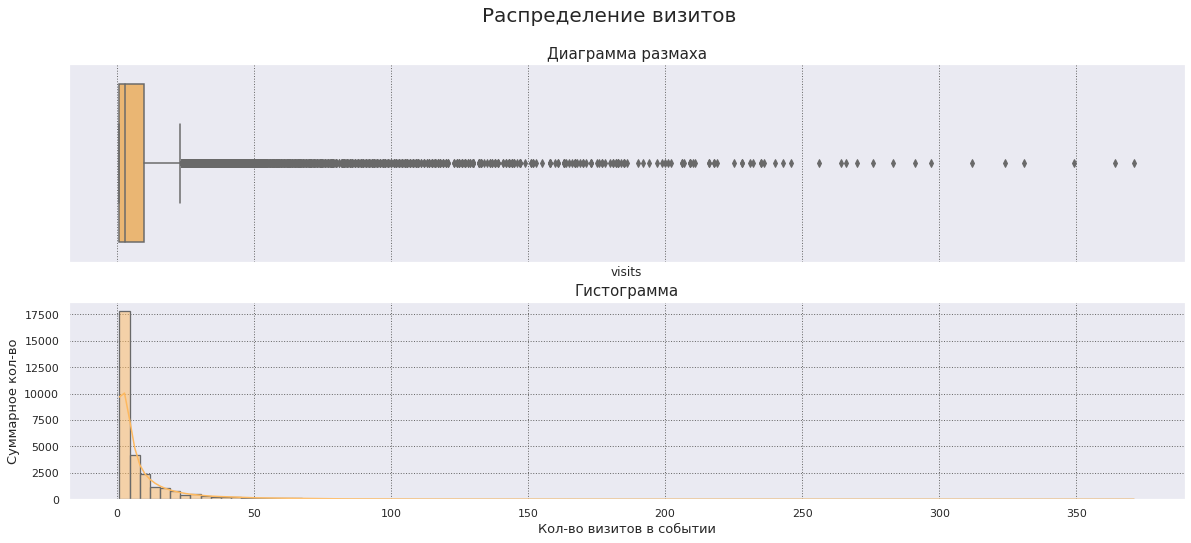

In [61]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title('Диаграмма размаха', size=15)
ax[1].set_title('Гистограмма', size=15)

sns.boxplot(data=dash_visits, x='visits', color='#FEB95F', ax=ax[0])
sns.histplot(dash_visits['visits'], bins=100, color='#FEB95F', edgecolor='dimgray',
             linewidth=1.3, ax=ax[1], kde = True)

plt.xlabel('Кол-во визитов в событии', size=13)
plt.ylabel('Суммарное кол-во', size=13)
plt.suptitle("Распределение визитов", size=20);


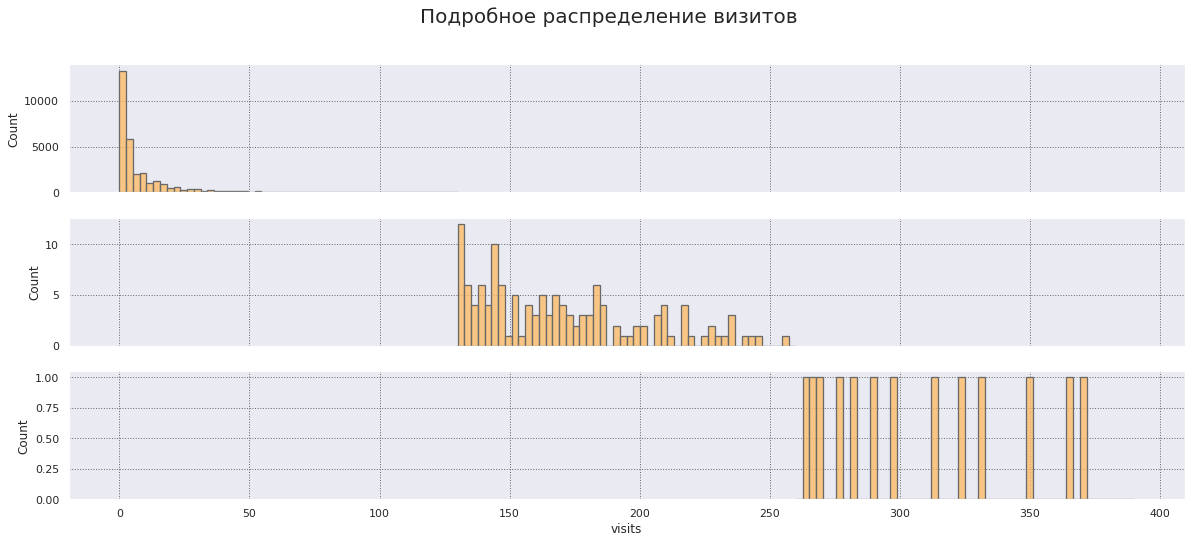

In [63]:
f, ax = plt.subplots(3,1, sharex=True)

sns.histplot(dash_visits['visits'], bins=50, color='#FEB95F', edgecolor='dimgray',
             linewidth=1.3, binrange=(0,130), ax=ax[0])

sns.histplot(dash_visits['visits'], bins=50, color='#FEB95F', edgecolor='dimgray',
             linewidth=1.3, binrange=(130,260), ax=ax[1])

sns.histplot(dash_visits['visits'], bins=50, color='#FEB95F', edgecolor='dimgray',
             linewidth=1.3, binrange=(260,390), ax=ax[2])

plt.suptitle("Подробное распределение визитов", size=20);

<font size=2,5> Большая часть значений в пределах до 25, далее идут выбросы с большим кол-вом визитов в событии, максимальное значение для одной записи составляет 371 визит, минимальное - 1. Нулевых значений нет, у каждой карточки статьи есть хотя бы один просмотр.

### вывод

<font size=2,5> Исходные данные в порядке, пропусков и дубликатов нет, типы данных также в порядке. Заметили большой разброс значений в столбце `visits`, но это на самом деле не удивительно, т.к. данный показатель отображает кол-во взаимодействий с карточками статей в Я.Дзене и, разумеется, в датасет могут попасть как статьи популярных авторов, так и не очень популярных, или вообще "новорегов".<br/>
    Никаких изменений в датасет перед экспортированием не вносим.

## Экспорт данных

In [64]:
dash_visits.to_csv('dash_visits.csv', index=False)